In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('customer_data.csv')
df.head()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1.0,56.0,61350.84215,12372.864450,15.0,77.685590,6232.122440
1,2.0,46.0,53777.18224,11001.604230,10.0,51.858351,5545.849698
2,3.0,32.0,39460.32263,8007.385018,19.0,98.166371,4054.645293
3,4.0,60.0,66672.12210,13526.548370,12.0,62.530976,6815.544393
4,5.0,38.0,44459.08553,9059.304083,9.0,46.470533,4617.833484


## 1. Data Cleaning

In [2]:
print("Null values in each column:")
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Membership_Years'] = df['Membership_Years'].fillna(df['Membership_Years'].median())

df.isnull().sum()

Null values in each column:
Number                  3
Age                     6
Income                  0
Spending_Score          2
Membership_Years        6
Purchase_Frequency      1
Last_Purchase_Amount    3
dtype: int64


Number                  3
Age                     0
Income                  0
Spending_Score          2
Membership_Years        0
Purchase_Frequency      1
Last_Purchase_Amount    3
dtype: int64

## 2. Descriptive Statistics

In [3]:
df.describe()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
count,1359.000000,1362.000000,1362.000000,1360.000000,1362.000000,1361.000000,1359.000000
mean,681.229581,43.234214,48334.035194,9767.529541,9.522761,49.582465,4932.572727
std,393.565092,12.507581,13570.566176,2532.259936,5.403335,27.060303,1266.655919
min,1.000000,18.000000,663.583370,4064.177336,1.000000,4.876052,2057.551913
25%,340.500000,33.000000,38444.944045,7831.028573,5.000000,26.576240,3965.545452
50%,682.000000,43.000000,48655.036840,9856.239066,9.000000,47.760506,4973.299941
75%,1021.500000,54.000000,58579.901010,11811.599117,14.000000,72.143427,5962.213931
max,1362.000000,64.000000,157951.445440,14791.611800,19.000000,99.492184,7519.376995


## 3. Univariate Analysis

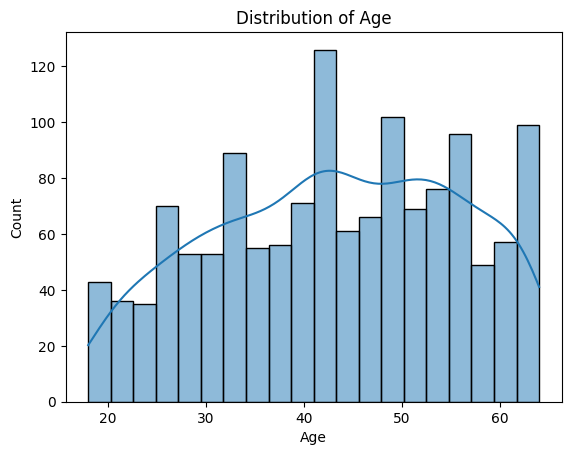

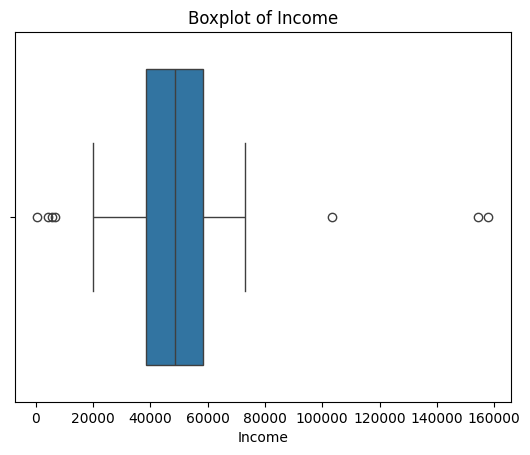

In [4]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

sns.boxplot(x=df['Income'])
plt.title("Boxplot of Income")
plt.show()

## 4. Scatter Plot – Bivariate Analysis

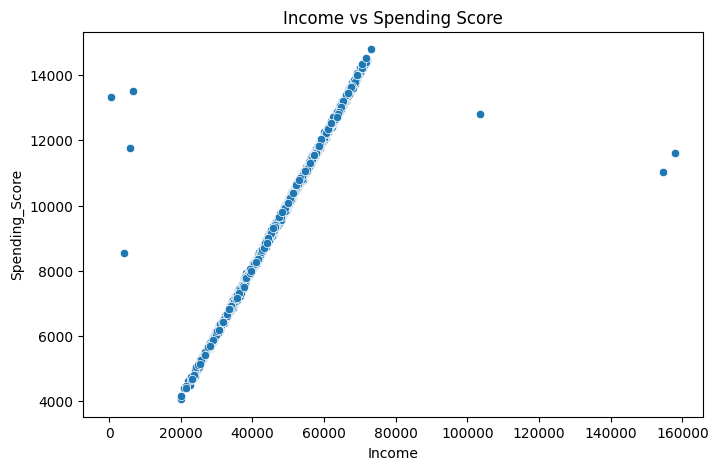

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Income', y='Spending_Score')
plt.title("Income vs Spending Score")
plt.show()

## 5. Correlation Analysis

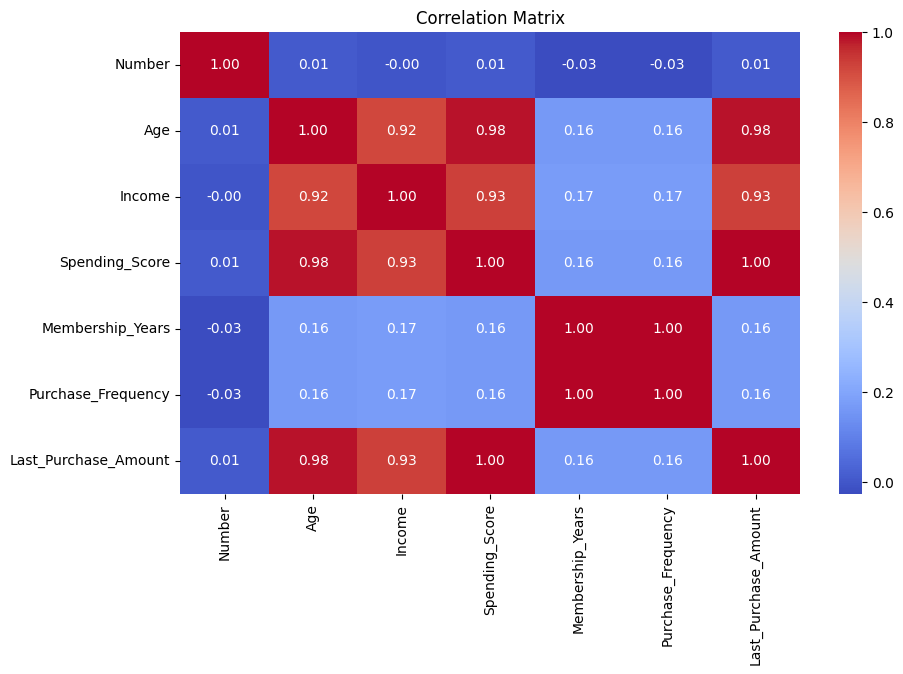

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## 6. Inferential Statistics

In [7]:
df['Income_Level'] = pd.qcut(df['Income'], q=2, labels=['Low', 'High'])

import scipy.stats as stats
group1 = df[df['Income_Level'] == 'Low']['Spending_Score']
group2 = df[df['Income_Level'] == 'High']['Spending_Score']

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

T-statistic: nan, P-value: nan


## 7. Feature Engineering

In [8]:
df['Spending_Per_Visit'] = df['Last_Purchase_Amount'] / df['Purchase_Frequency']

df[['Last_Purchase_Amount', 'Purchase_Frequency', 'Spending_Per_Visit']].head()

,Last_Purchase_Amount,Purchase_Frequency,Spending_Per_Visit
0,6232.122440,77.685590,80.222374
1,5545.849698,51.858351,106.942268
2,4054.645293,98.166371,41.303812
3,6815.544393,62.530976,108.994691
4,4617.833484,46.470533,99.371218


## 8. Dashboard Evaluation

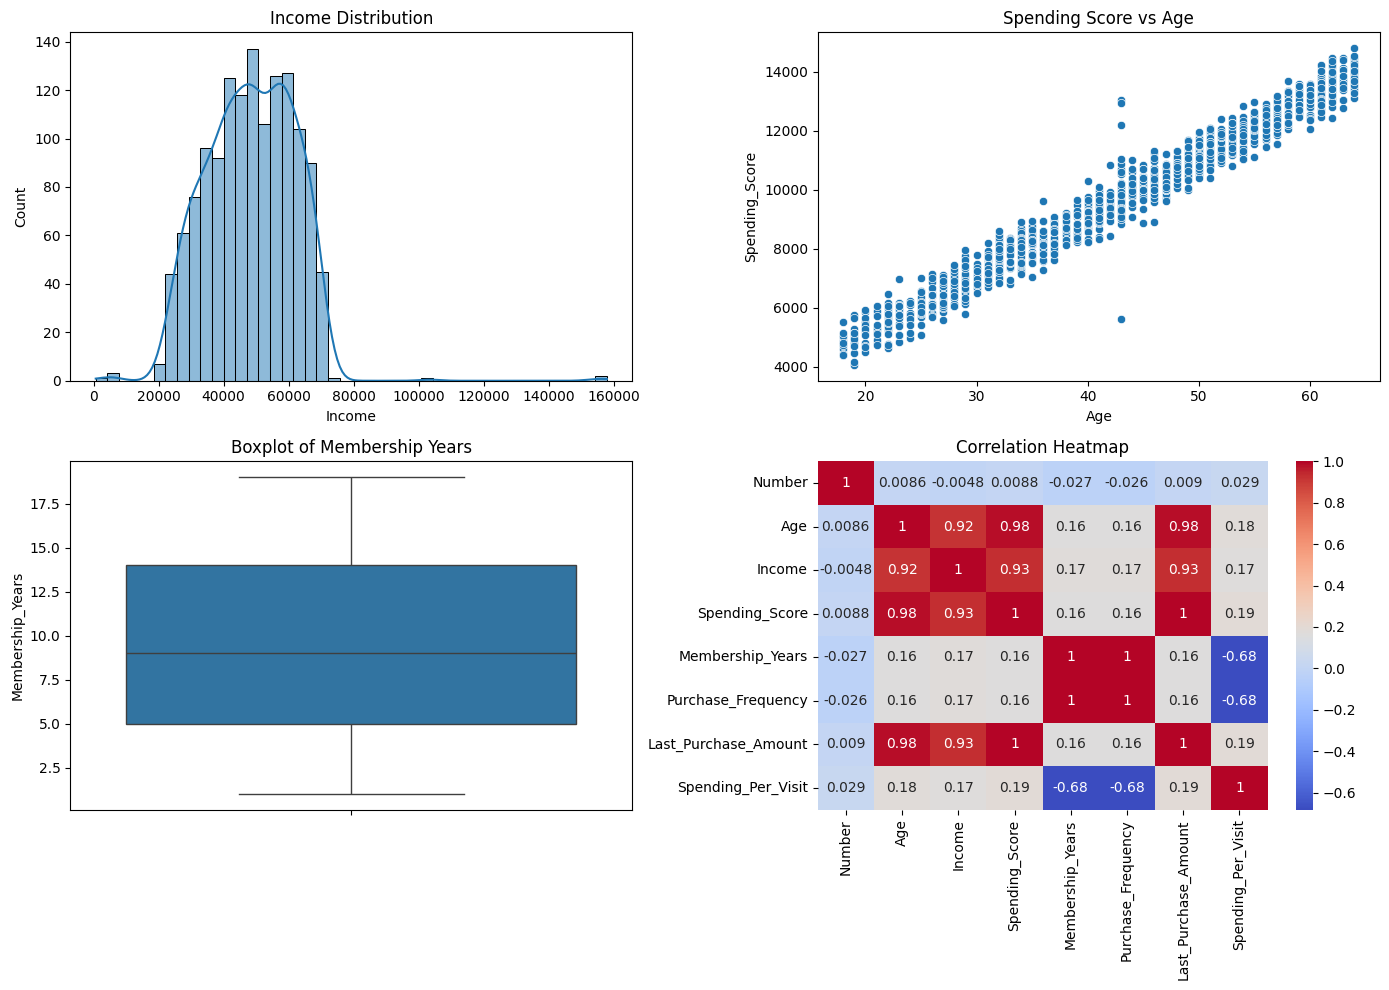

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(df['Income'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Income Distribution')

sns.scatterplot(data=df, x='Age', y='Spending_Score', ax=axs[0, 1])
axs[0, 1].set_title('Spending Score vs Age')

sns.boxplot(y='Membership_Years', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Membership Years')

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()